In [1]:
# Import your libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV file
bank_sub = pd.read_csv('bank-additional-full.csv', sep=';', na_values='unknown')

The data had values that were identified as "unknown" within the categorical variables. These values were set as null values in the dataframe due to the fact that clients possibly did not provide the information.

In [3]:
# Data Exploration
bank_sub.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

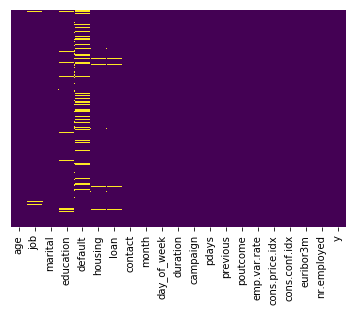

In [5]:
sns.heatmap(bank_sub.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The variables with missing values are job, marital, education, default, housing, and loan. Seaborn's heatmap was used to visualize the variables with missing values.

# Task 1: Deal with the missing values
The ideal situation of dealing with missing values is to fill them so that the data does not have loss of information. Most of the missing values are in character format. Since filling in the values with the average is not applicable, the solution is to replace them with the most frequent values.

In [6]:
# Filling in missing values using the mode function
bank_sub['job'].fillna(bank_sub['job'].mode()[0], inplace=True)
bank_sub['default'].fillna(bank_sub['default'].mode()[0], inplace=True)
bank_sub['education'].fillna(bank_sub['education'].mode()[0], inplace=True)
bank_sub['housing'].fillna(bank_sub['housing'].mode()[0], inplace=True)
bank_sub['loan'].fillna(bank_sub['loan'].mode()[0], inplace=True)

Next goal is to take care of the categorical variables.

# Task 2 : Encoding labels for categorical variables and creating dummy variables.

In [7]:
# Creating dummy variables
job = pd.get_dummies(bank_sub['job'])
job.drop(['admin.', 'blue-collar', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'], axis=1, inplace=True)
job.columns

Index(['entrepreneur'], dtype='object')

Notice that I dropped a good amount of dummy variables from the dataframe created. This was to reduce bias and multicollinearity when concatenating this to the main dataframe. From the job dataframe, I am only interested in entrepreneur. It is optional to pick any one of those variables to observe when building the model.

In [8]:
education = pd.get_dummies(bank_sub['education'])

In [9]:
education.columns

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree'],
      dtype='object')

In [10]:
education.drop(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course'], axis=1, inplace=True)

In [11]:
education.columns

Index(['university.degree'], dtype='object')

Same approach for the education variable. I'm only interested in seeing how much impact the university degree will have in the regression model.

In [12]:
marital = pd.get_dummies(bank_sub['marital'])
marital.columns

Index(['divorced', 'married', 'single'], dtype='object')

In [13]:
marital.drop(['divorced','single'], axis=1, inplace=True)
marital.columns

Index(['married'], dtype='object')

In [14]:
poutcome = pd.get_dummies(bank_sub['poutcome'])
poutcome.drop(['failure','nonexistent'], axis=1, inplace=True)
poutcome.columns

Index(['success'], dtype='object')

Next is encoding labels for the remaining categorical variables.

In [15]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [16]:
bank_sub['default'] = number.fit_transform(bank_sub['default'].astype('str'))
bank_sub['housing'] = number.fit_transform(bank_sub['housing'].astype('str'))
bank_sub['loan'] = number.fit_transform(bank_sub['loan'].astype('str'))
bank_sub['contact'] = number.fit_transform(bank_sub['contact'].astype('str'))
bank_sub['month'] = number.fit_transform(bank_sub['month'].astype('str'))
bank_sub['day_of_week'] = number.fit_transform(bank_sub['day_of_week'].astype('str'))

In [17]:
# Transform values for Binary output variable: 0 for No and 1 for Yes
bank_sub['y'] = number.fit_transform(bank_sub['y'].astype('str'))

Most of the remaining categorical variables are ranging from 0 to 1. 0 for No and 1 for Yes. The first five rows of the data are shown below for a clear perspective.

In [18]:
bank_sub.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Notice I still have marital, education, job, and poutcome in the data. I will concatenate this dataframe along with the other dataframes that created those dummy variables.

In [19]:
bank_sub = pd.concat([marital, job, education, poutcome, bank_sub], axis=1)

bank_sub.drop(['job','education','marital','poutcome'], axis=1, inplace=True)

In [20]:
bank_sub.head()

,married,entrepreneur,university.degree,success,age,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,0,0,0,56,0,0,0,1,6,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,1,0,0,0,57,0,0,0,1,6,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,0,0,0,37,0,1,0,1,6,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,40,0,0,0,1,6,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,1,0,0,0,56,0,0,1,1,6,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


# Task 3 : Exploratory Data Analysis

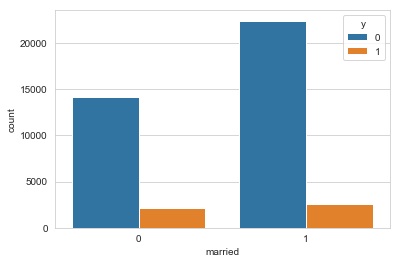

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='married', hue = 'y', data=bank_sub)

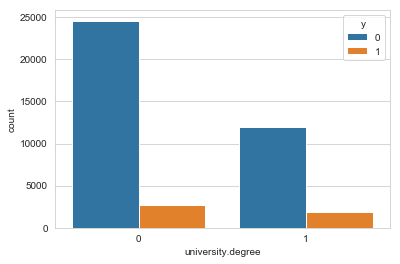

In [65]:
sns.countplot(x='university.degree', hue='y', data=bank_sub)

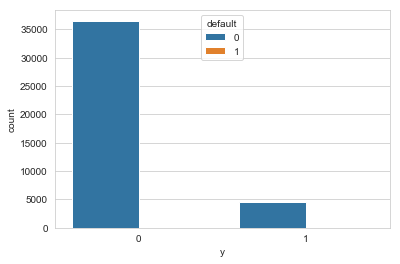

In [23]:
sns.countplot(x='y', hue='default', data=bank_sub)

To summarize, the countplots are telling us that most of the clients from the data did not subscribe to the term deposit.

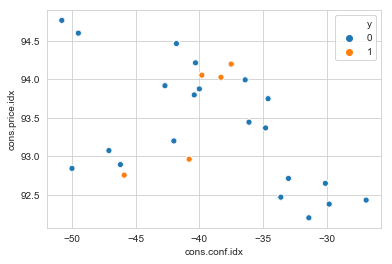

In [63]:
sns.scatterplot(x='cons.conf.idx', y='cons.price.idx', hue='y', data=bank_sub)

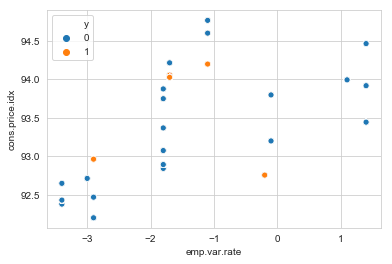

In [62]:
sns.scatterplot(x='emp.var.rate', y='cons.price.idx', hue='y',
                data=bank_sub)

Variables in this scatterplot are not really impacting one another. So, this isn't a strong correlation.

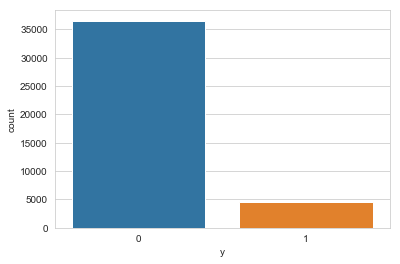

In [26]:
sns.countplot(x='y', data=bank_sub)

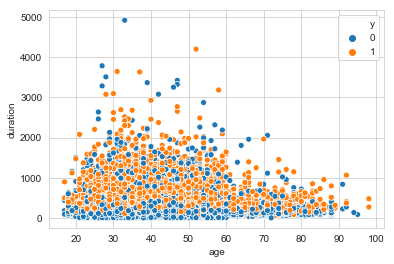

In [27]:
sns.scatterplot(x='age',y='duration', hue='y', data=bank_sub)

As we can see in the graph above, most clients within this age range subscribed when the duration is roughly between 500 to 2,500 seconds. Under those ranges, we notice a great number of those that did not subscribe.

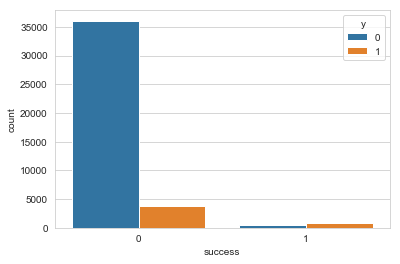

In [61]:
sns.countplot(x='success', hue='y', data=bank_sub)

In the previous outcome, the majority of unsuccessful attempts resulted in more clients choosing not to subscribe. However, the ones that succeeded had small numbers of clients subscribing.

# Training and Testing the Regression Model

In [29]:
# Importing packages from Sci-kit Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler
StandardScaler()
sc_X = StandardScaler()

In [31]:
# Train your model
X = bank_sub.drop('y', axis=1)
y = bank_sub['y']

In [32]:
# Split your data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

Splitting the data into a train set and a test set.

In [46]:
# Standardizing the data from the train and test set for the independent variables
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/Users/bendo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bendo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/bendo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
logmodel = LogisticRegression()

In [48]:
logmodel.fit(X_train, y_train)

/Users/bendo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10978
           1       0.65      0.39      0.49      1379

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



The precision in this report is telling me that 93% of class 0 is more relevant than class 1. This means that clients that did not subscribe to the term deposits are more relevant than the ones that did subscribe. Meanwhile, the recall correctly classified 97% of the clients that said no to the deposits.

In [51]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, predictions)

In [72]:
cnf_matrix = pd.DataFrame(cnf_matrix)

In [73]:
cnf_matrix

,0,1
0,10694,284
1,844,535


The top left index is the true negative and the bottom right index is the true positive. As for the top right index, it is the false positive. The bottom left is the false negative.

Text(0.5, 16.0, 'Predicted label')

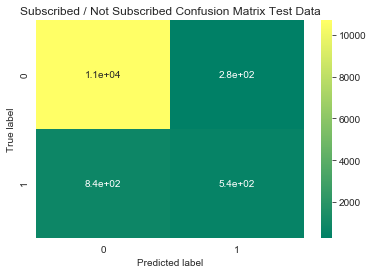

In [53]:
sns.heatmap(cnf_matrix, annot=True, cmap='summer')
plt.title('Subscribed / Not Subscribed Confusion Matrix Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Based on the model, it is possible to get customers to subscribe to the term deposits. However, it will be at a lower rate compared to the customers that did not subscribe. According to the confusion matrix, the model correctly predicted that 535 clients subscribed to the term deposits. As for the non-subscribers, 10,694 clients were correctly identified. We can examine the coefficients of the model to identify the attributes that increases the clients' likelihood to subscription.

In [59]:
# Initial Accuracy Score
logmodel.score(X,y)

0.8873458288821987

In [54]:
# Accuracy score after training the model
accuracy_score(y_test, predictions)

0.9087157076960427

In [55]:
# Coefficients of our logistic regression model
coeff_df = pd.DataFrame(list(zip(X.columns, np.transpose(logmodel.coef_))))

coeff_df

,0,1
0,married,[-0.07679096746603073]
1,entrepreneur,[-0.03615780257764865]
2,university.degree,[0.09959113809666921]
3,success,[0.1466216459921284]
4,age,[0.04298887765515209]
5,default,[-0.032768264539878564]
6,housing,[-0.003299104214779154]
7,loan,[-0.023323658250639912]
8,contact,[-0.3705269066191027]
9,month,[-0.2742849807359273]


As shown in the display above, the variables that increases the likelihood to subscription are university degree, success on previous outcome, age, day of the week, duration of the phone calls, consumer price index, consumer confidence index, and euribor 3 month rate. As for the variables with negative coefficients, the likelihood of customer subscription decreases.